In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

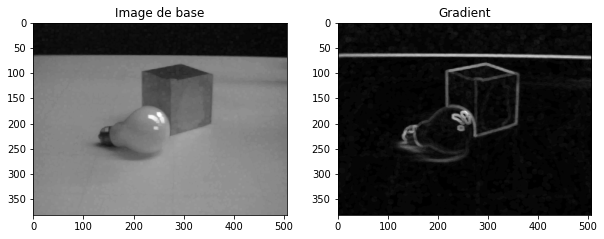

In [81]:
image = cv2.imread('Ampoule.png',0)
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
imageE = cv2.erode(image,S,iterations = 1)
imageD = cv2.dilate(image,S,iterations = 1)
gradient = imageD - imageE

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Gradient")
plt.imshow(gradient,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

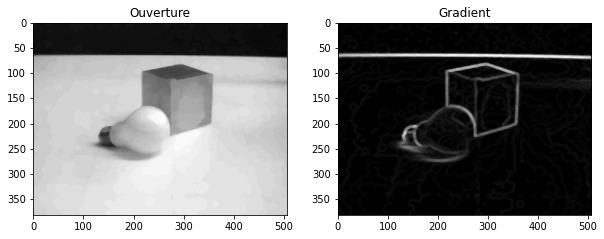

In [82]:
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
I = image
Ouver = cv2.morphologyEx(I, cv2.MORPH_OPEN, S)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
imageEO = cv2.erode(Ouver,S,iterations = 1)
imageDO = cv2.dilate(Ouver,S,iterations = 1)
gradient2 = imageDO - imageEO

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Ouverture")
plt.imshow(Ouver,'gray') # affichage de l'image I en niveau de gris

plt.subplot(122)
plt.title("Gradient")
plt.imshow(gradient2,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Plus l'élément structurant de l'image augmente, plus l'image après ouverture devient claire plus homogène mais les détails ne se distinguent plus et les lignes "fondent" lors du calcul du gradient
Si on augmente l'élémnt structurant du gradient, le résultat va devenir floue.

Exercice 2 /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

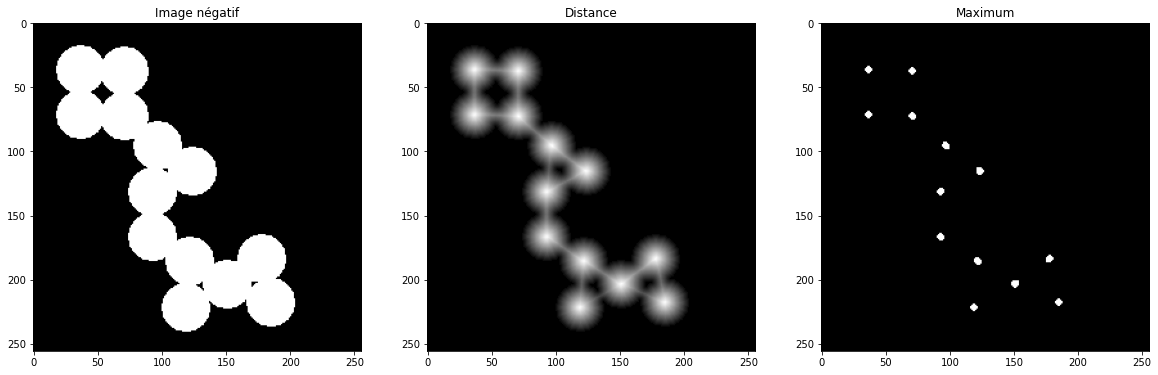

il y :  14  elements dans l'image avec le fond


In [83]:
image = cv2.imread('blobs2.png',0)

I_image = np.invert(image)
Dist = cv2.distanceTransform(I_image,cv2.DIST_L2,5,cv2.CV_32F)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19))
Erod = cv2.erode(Dist, S, iterations = 1)

seuil = 7
Erod[Erod<=seuil]=0
Erod[Erod>seuil]=1

i = cv2.connectedComponents(Erod.astype(np.uint8))

plt.figure(figsize=(20,20))

plt.subplot(131)
plt.title("Image négatif")
plt.imshow(I_image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(132)
plt.title("Distance")
plt.imshow(Dist,'gray') # affichage de l'image I en niveau de gris

plt.subplot(133)
plt.title("Maximum")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

print("il y : ",i[0]," elements dans l'image avec le fond")

Exercice 3 ///////////////////////////////////////////////////////////////////////////////////////////////////////////

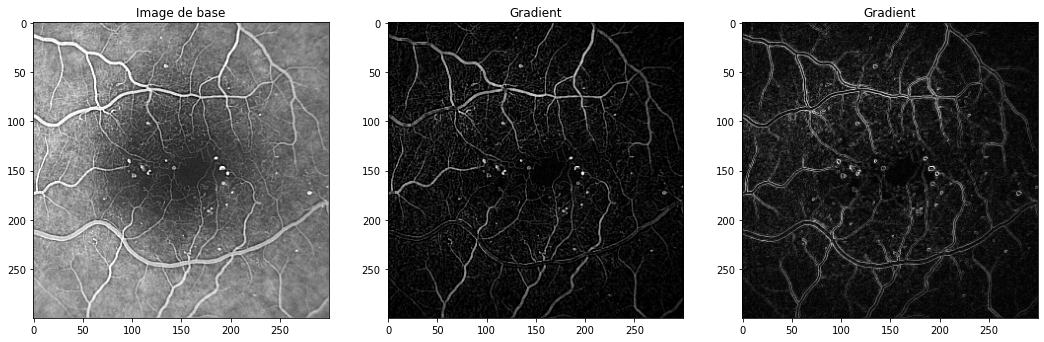

In [84]:
image = cv2.imread('angiogram.png',0)
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
Top = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, S)

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
imageE = cv2.erode(image,S,iterations = 1)
imageD = cv2.dilate(image,S,iterations = 1)
gradient = imageD - imageE



plt.figure(figsize=(18,18))

plt.subplot(131)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(132)
plt.title("Gradient")
plt.imshow(Top,'gray') # affichage de l'image I en niveau de gris

plt.subplot(133)
plt.title("Gradient")
plt.imshow(gradient,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage

Nous pouvons voir que le top hat est plus efficace car il met en évidence les détails avec une intensité élevés alors qu ele gradient ne met en évidenc que les contours de notre structures vasculaires.

Exercice 4 ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Cas 1

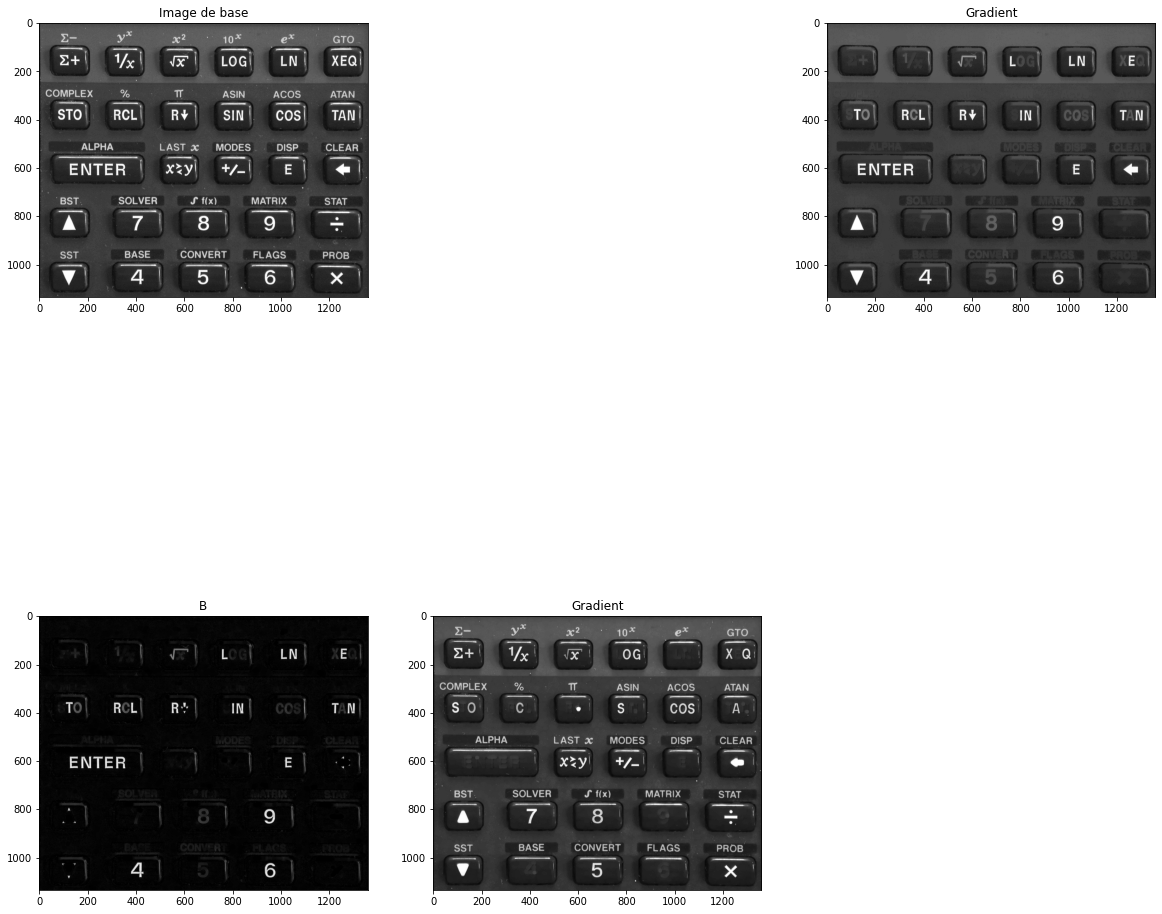

In [140]:
image = cv2.imread('calculator.png',0)
S = cv2.getStructuringElement(cv2.MORPH_RECT,(1,40))
Erod = cv2.erode(image, S, iterations = 1) 

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

plt.figure(figsize=(20,20))

plt.subplot(231)
plt.title("Image de base")
plt.imshow(image,'gray') # affichage de l'image I en niveau de gris

plt.subplot(132)
plt.title("Gradient")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris


Dilat = cv2.dilate(Erod, S, iterations = 1)
U = np.minimum(Dilat,image)

for i in range(1,40):
    Dilat = cv2.dilate(Erod, S, iterations = 1)
    U = np.minimum(Dilat,image)
    Erod = U

S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
Top = cv2.morphologyEx(U, cv2.MORPH_TOPHAT, S)
A = image - Top


plt.subplot(234)
plt.title("B")
plt.imshow(Top,'gray') # affichage de l'image I en niveau de gris

plt.subplot(235)
plt.title("Gradient")
plt.imshow(A,'gray') # affichage de l'image I en niveau de gris


plt.subplot(233)
plt.title("Gradient")
plt.imshow(Erod,'gray') # affichage de l'image I en niveau de gris
plt.show() # déclenche l'affichage